In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# Plots are being shown as "png". In order to run as interactive just remove "png" - fig.show()

### 1. Travelled distance by airlines.

In [2]:
distance = pd.read_csv("03_distance_per_airline.csv", header=None, sep='\t', names=["airline", "distance"])
distance.sort_values(by='distance', ascending=False, inplace=True)
distance

,airline,distance
15,Southwest Airlines Co,1012847097
1,American Airlines Inc,933094276
4,Delta Air Lines Inc,842409169
13,United Air Lines Inc,735789154
12,Skywest Airlines Inc,371959406
3,JetBlue Airways,325990368
2,Alaska Airlines Inc,320874363
17,Republic Airways In,187908301
10,Spirit Air Lines,181413538
9,American Eagle Airlines Inc,127857422


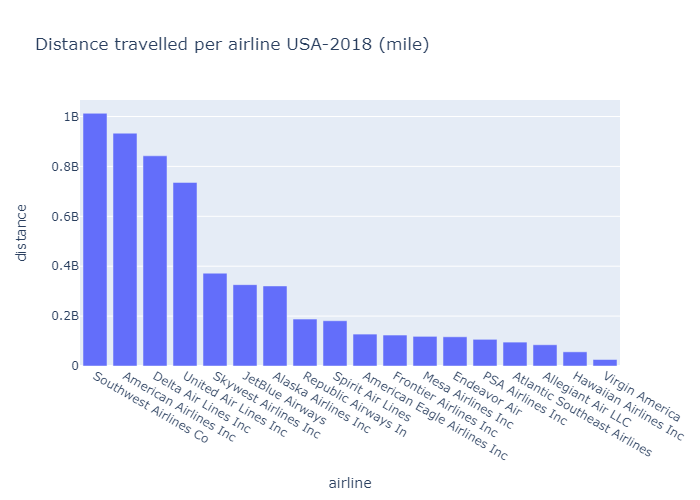

In [3]:
fig = px.bar(data_frame=distance, y="distance", x="airline", title="Distance travelled per airline USA-2018 (mile)")
fig.show("png")

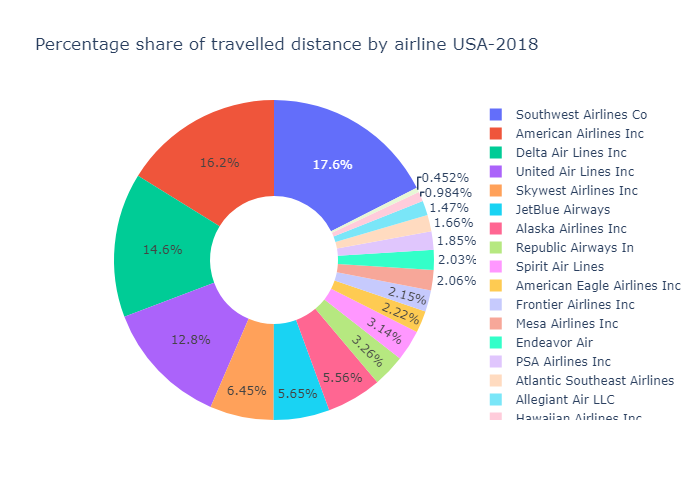

In [4]:
fig = px.pie(distance, values='distance', hole=0.4, names='airline', 
             title='Percentage share of travelled distance by airline USA-2018')
fig.show("png")

### 2. Average departure/arrival delay per airline.

In [5]:
avg_delay = pd.read_csv("05_avg_delay_per_airlines.csv", header=None, sep='\t') 
dep_arr_delay = avg_delay[1].str[1:-1].str.split(", ", expand=True)
avg_delay["dep_delay"], avg_delay["arr_delay"] = dep_arr_delay[0], dep_arr_delay[1]
avg_delay.drop(axis=1, labels=[1], inplace=True)
avg_delay.rename({0:"airline"}, axis=1, inplace=True)
avg_delay[["dep_delay", "arr_delay"]] = avg_delay[["dep_delay", "arr_delay"]].astype("float")
avg_delay.sort_values(by=['dep_delay', 'arr_delay'], ascending=False, inplace=True)
avg_delay

,airline,dep_delay,arr_delay
6,Frontier Airlines Inc,19.308902,13.915866
3,JetBlue Airways,15.542943,11.160693
7,Allegiant Air LLC,12.822118,9.876752
5,Atlantic Southeast Airlines,11.981374,8.527123
11,PSA Airlines Inc,11.538999,7.862456
15,Southwest Airlines Co,10.990128,4.449662
16,Mesa Airlines Inc,10.947936,8.604352
0,Endeavor Air,10.258937,4.280509
13,United Air Lines Inc,9.984616,5.703198
12,Skywest Airlines Inc,9.981179,6.922746


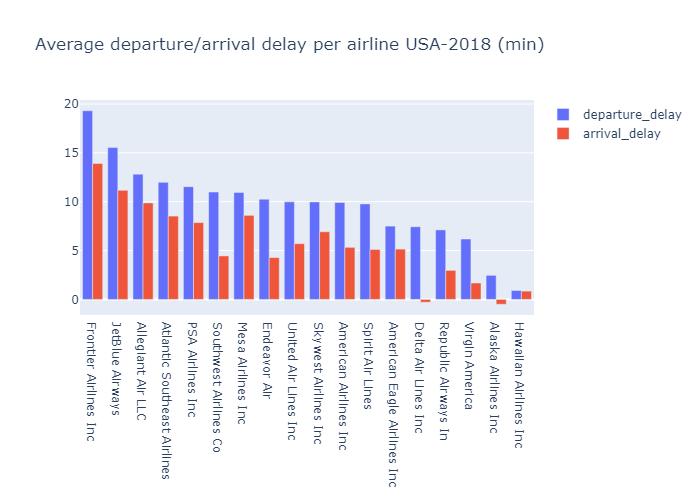

In [6]:
fig = go.Figure(data=[go.Bar(x=avg_delay.airline, y=avg_delay.dep_delay, name='departure_delay'),
                     go.Bar(x=avg_delay.airline, y=avg_delay.arr_delay, name='arrival_delay')],
               layout=go.Layout(title='Average departure/arrival delay per airline USA-2018 (min)'))
fig.show("png")

### 3. Cancelled flight rates by airline.

In [7]:
cancelled_flights = pd.read_csv("07_cancelled_flights_rate_per_airlines.csv", header=None, sep="\t", names=["airline", "cancelled_flights"])
cancelled_flights.cancelled_flights = cancelled_flights.cancelled_flights.apply(lambda x: round(x*100,2))
cancelled_flights.sort_values(by='cancelled_flights', inplace=True)

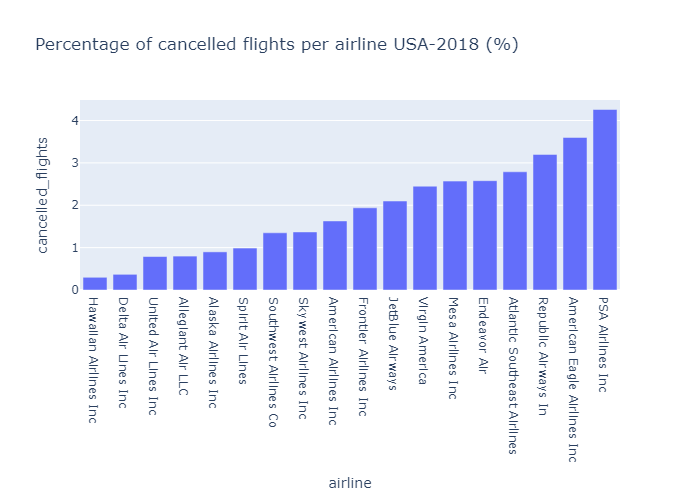

In [10]:
fig = px.bar(cancelled_flights, y="cancelled_flights", x="airline", title="Percentage of cancelled flights per airline USA-2018 (%)")
fig.show("png")

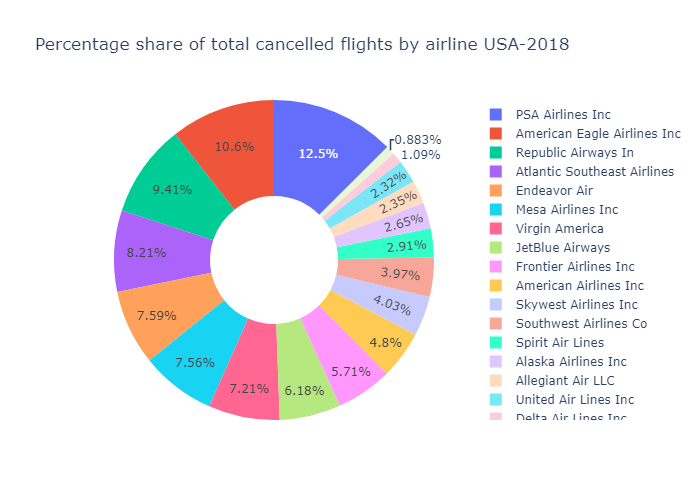

In [9]:
fig = px.pie(cancelled_flights, values='cancelled_flights', hole=0.4, names='airline', 
             title='Percentage share of total cancelled flights by airline USA-2018')
fig.show("png")